In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
diabetes.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
diabetes.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [6]:
# DATA CLEANING

<AxesSubplot:>

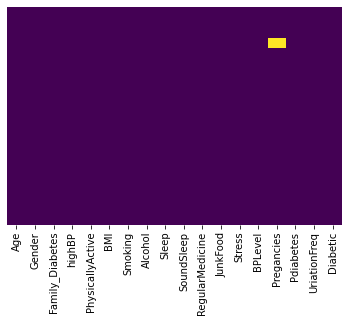

In [7]:
# get a picture for how much missing data we have
sns.heatmap(diabetes.isnull(), yticklabels=False, cbar=False, cmap='viridis') 
# largely clustered in Pregnancies column
# want to create a function to fill in missing values

<AxesSubplot:xlabel='Age', ylabel='Pregancies'>

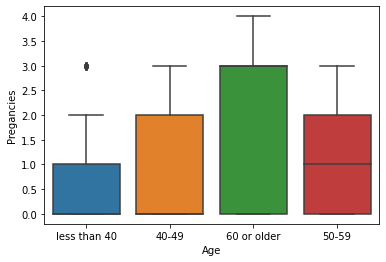

In [8]:
# want to find avg num of pregnancies for diff age groups
sns.boxplot(data = diabetes[diabetes['Gender'] == 'Female'], x='Age', y='Pregancies')

In [9]:
diabetes_fm = diabetes[diabetes['Gender'] == 'Female']
diabetes_fm_40 = diabetes_fm[diabetes_fm['Age'] == 'less than 40']
diabetes_fm_50 = diabetes_fm[diabetes_fm['Age'] == '40-49']
diabetes_fm_60 = diabetes_fm[diabetes_fm['Age'] == '50-59']
diabetes_fm_over60 = diabetes_fm[diabetes_fm['Age'] == '60 or older']
print(f'mean number of pregnancies for ages less than 40 is', np.mean(diabetes_fm_40['Pregancies']))
print(f'mean number of pregnacnices for ages 40-49 is', np.mean(diabetes_fm_50['Pregancies']))
print(f'mean number of pregnancies for ages 50-59 is', np.mean(diabetes_fm_60['Pregancies']))
print(f'mean number of pregnancies for ages 60 or older is', np.mean(diabetes_fm_over60['Pregancies']))
# round off number of pregnancies to nearest whole number
preg_40 = round(np.mean(diabetes_fm_40['Pregancies']))
preg_50 = round(np.mean(diabetes_fm_50['Pregancies']))
preg_60 = round(np.mean(diabetes_fm_60['Pregancies']))
preg_over60 = round(np.mean(diabetes_fm_over60['Pregancies']))

mean number of pregnancies for ages less than 40 is 0.5748502994011976
mean number of pregnacnices for ages 40-49 is 1.1176470588235294
mean number of pregnancies for ages 50-59 is 1.0
mean number of pregnancies for ages 60 or older is 2.0392156862745097


In [10]:
#We create a function that replaces null values of pregnancies for each woman into the mean number of pregnancies 
# of the age group the woman is in
def impute_pregnancy(df):
    Age_group = df[0]
    Gender = df[1]
    num_of_pregnancies = df[2]
    
    if pd.isnull(num_of_pregnancies):
        if Gender == 'Male':
            return 0.0
        elif Age_group == 'less than 40':
            return preg_40
        elif Age_group == '40-49':
            return preg_50
        elif Age_group == '50-59':
            return preg_60
        elif Age_group == '60 or older':
            return preg_over60
    else:
        return num_of_pregnancies

In [11]:
diabetes['Pregancies'] = diabetes[['Age','Gender','Pregancies']].apply(impute_pregnancy,axis=1)

<AxesSubplot:>

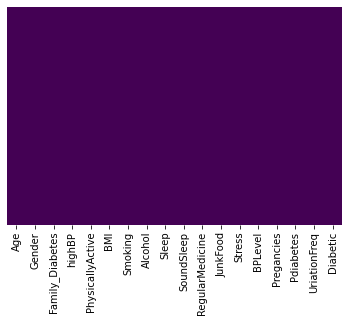

In [12]:
sns.heatmap(diabetes.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# pregnancy nulls successfully removed

In [13]:
# we want to replace categorical data into numeric counterparts so we can do data analysis

diabetes['Gender'].replace(to_replace = ['Male', 'Female'], value = [0, 1], inplace = True)

def binary_converter(cols):
    Family_Diabetes = cols
    
    if Family_Diabetes == 'no':
        return 0
    elif Family_Diabetes == 'yes':
        return 1
def binary_converter2(cols):
    Family_Diabetes = cols
    
    if Family_Diabetes == 'not much':
        return 0
    elif Family_Diabetes == 'quite often':
        return 1

In [14]:
diabetes['Family_Diabetes'] = diabetes['Family_Diabetes'].apply(binary_converter)
diabetes['Smoking'] = diabetes['Smoking'].apply(binary_converter)
diabetes['Alcohol'] = diabetes['Alcohol'].apply(binary_converter)
diabetes['RegularMedicine'] = diabetes['RegularMedicine'].apply(binary_converter)
diabetes['Diabetic'] = diabetes['Diabetic'].apply(binary_converter)
diabetes['UriationFreq'] = diabetes['UriationFreq'].apply(binary_converter2)

In [15]:
diabetes.head(20)
#diabetes.describe()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,0,0,yes,one hr or more,39.0,0,0,8,6,0.0,occasionally,sometimes,high,0.0,0,0,0.0
1,50-59,0,0,yes,less than half an hr,28.0,0,0,8,6,1.0,very often,sometimes,normal,0.0,0,0,0.0
2,40-49,0,0,no,one hr or more,24.0,0,0,6,6,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
3,50-59,0,0,no,one hr or more,23.0,0,0,8,6,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
4,40-49,0,0,no,less than half an hr,27.0,0,0,8,8,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
5,40-49,0,0,yes,none,21.0,0,1,10,10,0.0,occasionally,sometimes,high,0.0,0,0,1.0
6,less than 40,0,0,no,one hr or more,24.0,0,0,8,8,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
7,less than 40,0,0,no,less than half an hr,20.0,0,0,7,7,1.0,occasionally,sometimes,low,0.0,0,0,0.0
8,40-49,0,1,no,one hr or more,23.0,0,0,7,7,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
9,less than 40,0,0,no,more than half an hr,20.0,0,0,8,8,NaN,occasionally,sometimes,normal,0.0,0,0,0.0


In [16]:
# highBP column largely extraneous given BPlevel column... drop from dataset
diabetes.drop(['highBP'], axis = 1, inplace=True)

In [17]:
diabetes[diabetes['Gender']==0]['Pdiabetes'].value_counts()
#Oops, why there is a male patient who has gestational diabetes? We will drop this from our dataset

0      578
yes      1
Name: Pdiabetes, dtype: int64

In [18]:
diabetes.drop(diabetes[(diabetes['Gender']==0) & (diabetes['Pdiabetes']==1)].index,inplace=True)

In [19]:
diabetes['BPLevel'].nunique()
diabetes['BPLevel'].value_counts()

normal     707
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64

In [20]:
# it looks like not all of our textual data is in the format we want... write a function to homogenize BPLevel
def lowerupper(col):
    if col == 'Low':
        return 'low'
    elif col == 'High':
        return 'high'
    elif col == 'normal ':
        return 'normal'
    else:
        return col
    
def lowerupper2(col):
    if col == 'no ':
        return 'no'
    elif col == ' no':
        return 'no'
    else:
        return col

In [21]:
diabetes['BPLevel'] = diabetes['BPLevel'].apply(lowerupper)
diabetes['Diabetic'] = diabetes['Diabetic'].apply(lowerupper2)

In [22]:
diabetes['JunkFood'].nunique()

4

In [23]:
diabetes['JunkFood'].value_counts()

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64

In [24]:
diabetes['Stress'].nunique()

4

In [25]:
diabetes['Stress'].value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [26]:
diabetes['PhysicallyActive'].nunique()

4

In [27]:
diabetes['PhysicallyActive'].value_counts()

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

In [28]:
diabetes['Age'].nunique()

4

In [29]:
diabetes['Age'].value_counts()

less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64

In [30]:
BP_level = pd.get_dummies(diabetes['BPLevel'], drop_first = True)
diabetes.drop(['BPLevel'], axis=1, inplace = True)
diabetes = pd.concat([diabetes, BP_level], axis = 1)

Stress = pd.get_dummies(diabetes['Stress'], drop_first = True)
diabetes.drop(['Stress'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, Stress], axis = 1)

JunkFood = pd.get_dummies(diabetes['JunkFood'], drop_first = True)
diabetes.drop(['JunkFood'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, JunkFood], axis = 1)

PhysicallyActive = pd.get_dummies(diabetes['PhysicallyActive'], drop_first = True)
diabetes.drop(['PhysicallyActive'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, PhysicallyActive], axis = 1)

Age = pd.get_dummies(diabetes['Age'], drop_first = True)
diabetes.drop(['Age'], axis = 1, inplace = True)
diabetes = pd.concat([diabetes, Age], axis = 1)

In [31]:
pd.set_option('display.max_columns', None)
diabetes.head()
#diabetes.describe()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pregancies,Pdiabetes,UriationFreq,Diabetic,low,normal,not at all,sometimes,very often,occasionally,often,very often,more than half an hr,none,one hr or more,50-59,60 or older,less than 40
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [32]:
diabetes['Pdiabetes'].nunique()
diabetes['Pdiabetes'].value_counts()
type(diabetes['Pdiabetes'][0])

str

In [33]:
# looks like pdiabetes column isn't numeric... write a function to clean it
def pdiabetes_converter(pdiabetes):
    if pdiabetes == 'yes':
        return 1
    elif pdiabetes == 'no':
        return 0
    else:
        return 0

In [34]:
diabetes['Pdiabetes'] = diabetes['Pdiabetes'].apply(pdiabetes_converter)

In [35]:
diabetes.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pregancies,Pdiabetes,UriationFreq,Diabetic,low,normal,not at all,sometimes,very often,occasionally,often,very often,more than half an hr,none,one hr or more,50-59,60 or older,less than 40
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [36]:
# all columns have been successfully converted to numerical form for our ML algorithms!
# now let's change the names of our columns to make it clear what they represent

diabetes.rename(columns = {'low':'low BP', 'normal':'normal BP',
                              'not at all':'no stress', 'sometimes':'occasional stress',
                          'very often':'high stress', 'occasionally':'healthy diet', 'often': 'unhealthy diet',
                          'very often': 'very unhealthy diet', 'more than half an hr': '0.5+ hr exercise',
                          'none': '0 hr exercise', 'one hr or more':'1+ hr exercise','Pregancies':'pregnancies'}, inplace = True)

In [37]:
diabetes['very unhealthy diet'].head()

,very unhealthy diet,very unhealthy diet
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [38]:
# as we see here we had 2 columns titled 'very often', but both columns were assigned the same label!
diabetes2 = diabetes['very unhealthy diet']
diabetes.drop('very unhealthy diet', axis = 1, inplace = True)
diabetes2.columns = ['high stress', 'very unhealthy diet']
diabetes2
diabetes = pd.concat([diabetes, diabetes2], axis = 1)

In [39]:
# remove all "one-off" null entries
diabetes.dropna(inplace = True)
diabetes.describe()
diabetes.head()
# successfully removed 6 rows with missing info

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,pregnancies,Pdiabetes,UriationFreq,Diabetic,low BP,normal BP,no stress,occasional stress,healthy diet,unhealthy diet,0.5+ hr exercise,0 hr exercise,1+ hr exercise,50-59,60 or older,less than 40,high stress,very unhealthy diet
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,1,0,0,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


In [40]:
diabetes.shape

(946, 26)

In [41]:
# EDA

In [42]:
# let's explore the relationship between different variables in our datset

In [43]:
# unfortunately our dataset is mostly comprised of categorical data, making EDA challenging
# to solve this we will assign all our categorical data a randomly-generated number based on
# the diff column names and plot this data to ascertain a rough relationship between diff variables

In [44]:
eda_dataset = pd.read_csv('diabetes_dataset__2019.csv')
eda_dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [45]:
# Now we see how many different values do each catagorical column has 
eda_dataset['Stress'].value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [46]:
eda_dataset['JunkFood'].value_counts()

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64

In [47]:
eda_dataset['PhysicallyActive'].value_counts()

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

In [48]:
#Recall that the 'BPLevel' column has some entries followed by a space behind them
#Use the cleaning function before
eda_dataset['BPLevel'] = eda_dataset['BPLevel'].apply(lowerupper)

In [49]:
eda_dataset['BPLevel'].value_counts()

normal    708
high      216
low        28
Name: BPLevel, dtype: int64

In [50]:
import random
def stress_converter(column):
    if column == 'not at all':
        return random.uniform(0, 0.25)
    elif column == 'sometimes':
        return random.uniform(0.25, 0.5)
    elif column == 'very often':
        return random.uniform(0.5, 0.75)
    else:
        return random.uniform(0.75, 1)
    
def junkfood_converter(column):
    if column == 'occasionally':
        return random.uniform(0, 0.25)
    elif column == 'often':
        return random.uniform(0.25, 0.5)
    elif column == 'very often':
        return random.uniform(0.5, 0.75)
    else:
        return random.uniform(0.75, 1)
    
def BPLevel_converter(columns):
    if columns[0] == 'low':
        columns[0] = random.uniform(0, 0.333)
        return columns
    elif columns[0] == 'normal':
        columns[0] = random.uniform(0.333, 0.667)
        return columns
        '''if columns[1] == 'no':
            columns[0] = random.uniform(0.333, 0.5)
            return columns
        elif columns[0] == 'yes':
            columns[0] = random.uniform(0.5, 
                                        0.667)
            return columns'''
    elif columns[0] == 'high':
        columns[0] = random.uniform(0.667, 0.999)
        return columns
    
def phys_active_converter(column):
    if column == 'none':
        return random.uniform(0, 0.25)
    elif column == 'less than half an hr':
        return random.uniform(0.25, 0.5)
    elif column == 'more than half an hr':
        return random.uniform(0.5, 0.75)
    else:
        return random.uniform(0.75, 1)

eda_dataset['Stress'] = eda_dataset['Stress'].apply(stress_converter)
eda_dataset['JunkFood'] = eda_dataset['JunkFood'].apply(junkfood_converter)
eda_dataset['PhysicallyActive'] = eda_dataset['PhysicallyActive'].apply(phys_active_converter)
eda_dataset[['BPLevel', 'highBP']] = eda_dataset[['BPLevel', 'highBP']].apply(BPLevel_converter, axis = 1)
eda_dataset['Diabetic'] = eda_dataset['Diabetic'].apply(binary_converter)
eda_dataset['RegularMedicine'] = eda_dataset['RegularMedicine'].apply(binary_converter)

In [51]:
eda_dataset.head()
#Now we converted 4 catagorical columns into numerical by assigning labels of each column with numbers generated within
#a specific interval

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,0.877744,39.0,no,no,8,6,0.0,0.045706,0.266483,0.872323,0.0,0,not much,0.0
1,50-59,Male,no,yes,0.447120,28.0,no,no,8,6,1.0,0.598161,0.281767,0.509703,0.0,0,not much,0.0
2,40-49,Male,no,no,0.756495,24.0,no,no,6,6,0.0,0.213255,0.493205,0.641474,0.0,0,not much,0.0
3,50-59,Male,no,no,0.797608,23.0,no,no,8,6,0.0,0.093035,0.426413,0.584790,0.0,0,not much,0.0
4,40-49,Male,no,no,0.489072,27.0,no,no,8,8,0.0,0.208244,0.316397,0.362539,0.0,0,not much,0.0


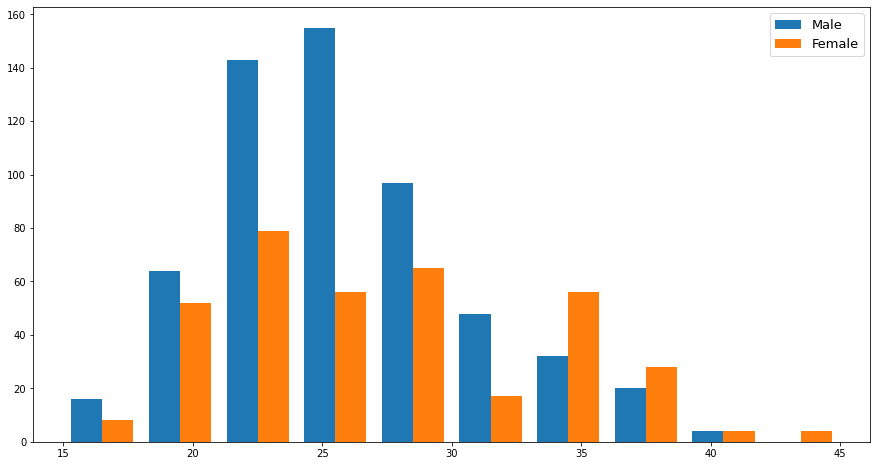

In [52]:
plt.figure(figsize=(15,8))
x = eda_dataset[eda_dataset['Gender']=='Male']['BMI']
y = eda_dataset[eda_dataset['Gender']=='Female']['BMI']
plt.hist([x, y],label=['Male','Female'])
plt.legend(fontsize=13)
plt.show()
#From this graph, female patients tend to have higher BMI than male patients

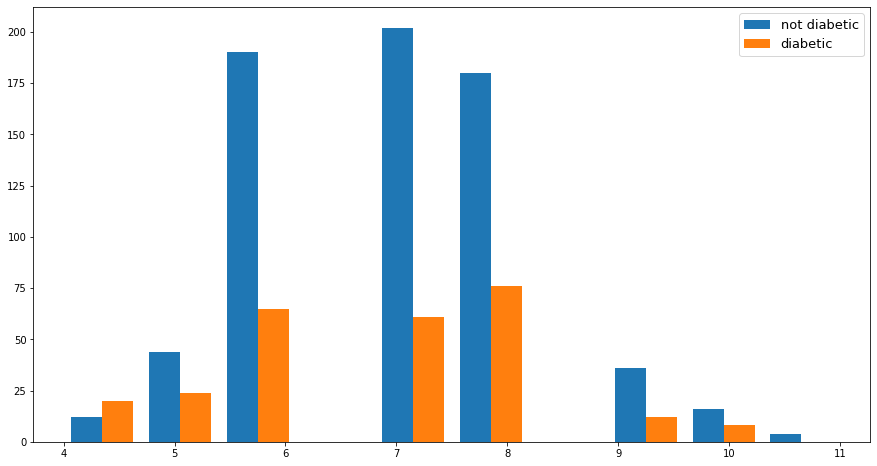

In [53]:
plt.figure(figsize=(15,8))
x = eda_dataset[eda_dataset['Diabetic']==0.0]['Sleep']
y = eda_dataset[eda_dataset['Diabetic']==1.0]['Sleep']
plt.hist([x, y],label=['not diabetic','diabetic'])
plt.legend(fontsize=13)
plt.show()
#No evident trend between time of sleep and contracting diabetes, amount of sleep follows a Gaussian distribution

<Figure size 1080x576 with 0 Axes>

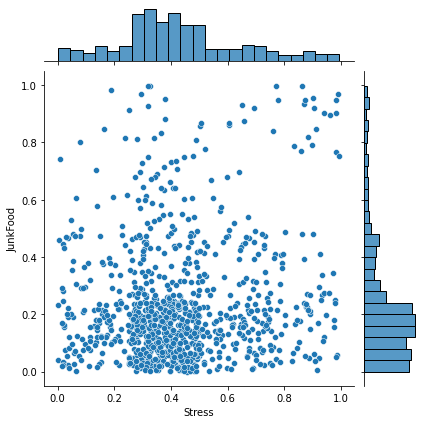

In [54]:
plt.figure(figsize=(15,8))
sns.jointplot(x='Stress', y='JunkFood', data = eda_dataset)
#Looks like there is no correlation 

<Figure size 1080x576 with 0 Axes>

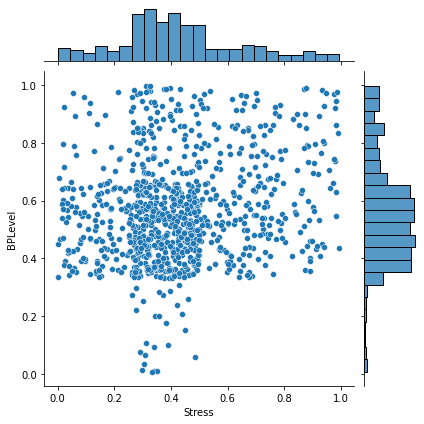

In [55]:
plt.figure(figsize=(15,8))
sns.jointplot(x='Stress', y='BPLevel', data = eda_dataset)
#Looks like there is no correlation 

<AxesSubplot:xlabel='RegularMedicine', ylabel='PhysicallyActive'>

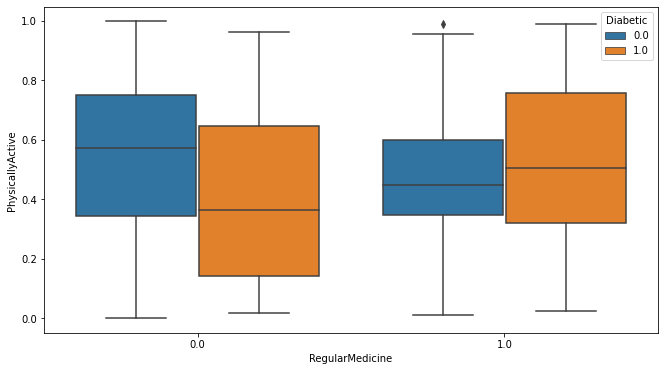

In [56]:
plt.figure(figsize=(11,6))
sns.boxplot(x = 'RegularMedicine', y= 'PhysicallyActive', hue = 'Diabetic', data=eda_dataset)
# it appears that lower levels of physical activity is correlated to higher risk of diabetes

In [57]:
def diabetic_converter(pdiabetes):
    if pdiabetes == 'yes':
        return 1
    elif pdiabetes == 'no':
        return 0
    else:
        return 0

eda_dataset['Diabetic'] = eda_dataset['Diabetic'].apply(diabetic_converter)

<AxesSubplot:xlabel='BPLevel', ylabel='count'>

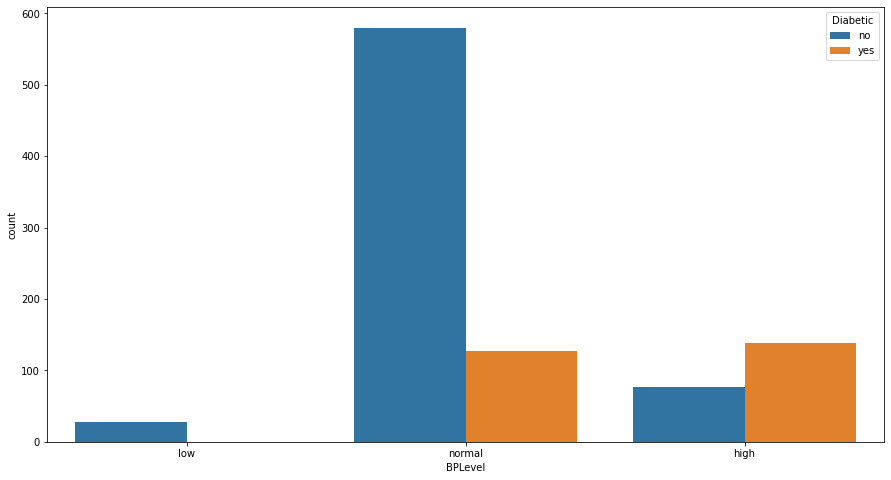

In [58]:
diabetes2 = pd.read_csv('diabetes_dataset__2019.csv')
diabetes2['BPLevel'] = diabetes2['BPLevel'].apply(lowerupper)
diabetes2['Diabetic'] = diabetes2['Diabetic'].apply(lowerupper2)
plt.figure(figsize=(15,8))
sns.countplot(x='BPLevel', data=diabetes2, hue='Diabetic',order=['low','normal','high'])
# People with higher bloodpressure tend to be more prone in contracting diabetes

In [59]:
# MACHINE LEARNING

In [60]:
# First, let's split our data into training and testing sets

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA

In [62]:
# we rearrage our dataset to cluster catagorical data together and numerical data together
diabetes3 = diabetes[['BMI','Sleep','SoundSleep','pregnancies']]
diabetes.drop(['BMI','Sleep','SoundSleep','pregnancies'], axis=1, inplace=True)

In [63]:
diabetes = pd.concat([diabetes,diabetes3],axis = 1)
diabetes.head()

,Gender,Family_Diabetes,Smoking,Alcohol,RegularMedicine,Pdiabetes,UriationFreq,Diabetic,low BP,normal BP,no stress,occasional stress,healthy diet,unhealthy diet,0.5+ hr exercise,0 hr exercise,1+ hr exercise,50-59,60 or older,less than 40,high stress,very unhealthy diet,BMI,Sleep,SoundSleep,pregnancies
0,0,0,0,0,0.0,0,0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,39.0,8,6,0.0
1,0,0,0,0,1.0,0,0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,28.0,8,6,0.0
2,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,24.0,6,6,0.0
3,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,23.0,8,6,0.0
4,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,27.0,8,8,0.0


In [64]:
X = diabetes.drop('Diabetic', axis=1)
y = diabetes['Diabetic']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [66]:
print(y_train.value_counts())
print(y_test.value_counts())
# it looks like our data is imbalanced... we will use SMOTE algorithm to oversample positive test cases

0.0    471
1.0    191
Name: Diabetic, dtype: int64
0.0    210
1.0     74
Name: Diabetic, dtype: int64


In [67]:
def smote_data(X, y):
    smotenc = SMOTENC(sampling_strategy = 1.0, categorical_features = list(range(0,22)), random_state = 3)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote
X_train_smote, y_train_smote = smote_data(X_train, y_train)

# we don't want to run SMOTE algorithm on testing data, as doing so will alter the actual data and
# thus result in an inaccurate view of model performance

In [68]:
print(y_train_smote.value_counts())

1.0    471
0.0    471
Name: Diabetic, dtype: int64


In [69]:
# LOGISTIC REGRESSION

In [70]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [71]:
pred = logmodel.predict(X_test)

In [72]:
# Evaluate our data

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       210
         1.0       0.79      0.78      0.79        74

    accuracy                           0.89       284
   macro avg       0.86      0.86      0.86       284
weighted avg       0.89      0.89      0.89       284



In [74]:
print(confusion_matrix(y_test, pred))

[[195  15]
 [ 16  58]]


In [75]:
# Now let's repeat using balanced data
logmodel2 = LogisticRegression(solver='liblinear')
logmodel2.fit(X_train_smote,y_train_smote)

LogisticRegression(solver='liblinear')

In [76]:
pred1 = logmodel2.predict(X_test)

In [77]:
print(classification_report(y_test,pred1))
# we performed better with unbalanced data

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       210
         1.0       0.63      0.81      0.71        74

    accuracy                           0.83       284
   macro avg       0.78      0.82      0.79       284
weighted avg       0.85      0.83      0.83       284



In [78]:
# INTERPRETING OUR DATA
# 92% of those our model predicted would contract diabetes actually did
# 79% of those our model predicted would not contract diabetes did not
# 93% of those who did not contract diabetes were correctly identified
# 78% of those who did contract diabetes were correctly identified

# our model is overall strong, but could perhaps have improved performance in predicting positive cases 
# for predicting diabetes we will privliege higher RECALL over PRECISION
# retrain model using gridsearch to identify best parameters

In [79]:
grid = {
    'C': [0.1,1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
        }

In [80]:
gs = GridSearchCV(estimator = LogisticRegression(solver='liblinear', random_state = 3), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)

In [81]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=LogisticRegression(random_state=3, solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [82]:
# check best parameters / estimator
gs.best_params_

{'C': 10, 'penalty': 'l1'}

In [83]:
gs.best_estimator_

LogisticRegression(C=10, penalty='l1', random_state=3, solver='liblinear')

In [84]:
gs_predictions = gs.predict(X_test)

In [85]:
print(classification_report(y_test, gs_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       210
         1.0       0.79      0.82      0.81        74

    accuracy                           0.90       284
   macro avg       0.86      0.87      0.87       284
weighted avg       0.90      0.90      0.90       284



In [86]:
# not much improvement!... looks like our model is maxed out of possible improvements

In [87]:
# KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [125]:
knn.fit(X_train_smote,y_train_smote)

KNeighborsClassifier()

In [126]:
pred2 = knn.predict(X_test)

In [127]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       210
         1.0       0.69      0.61      0.65        74

    accuracy                           0.83       284
   macro avg       0.78      0.76      0.77       284
weighted avg       0.82      0.83      0.82       284



In [128]:
# first we need to standardize the values of diff columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [129]:
scaler.fit(diabetes.drop('Diabetic',axis=1))
scaled_features = scaler.transform(diabetes.drop('Diabetic',axis=1))

In [130]:
# dimension is too high, we need to reduce using PCA
# find best number of dimensions to reduce to

In [131]:
error_rate = []

for i in range(1,25):
    pca = PCA(n_components = i)
    pca.fit(scaled_features)
    scaled_features2 = pca.transform(scaled_features)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_features2, diabetes['Diabetic'],
                                                    test_size=0.30, random_state = 3)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train2,y_train2)
    pred_i = knn.predict(X_test2)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

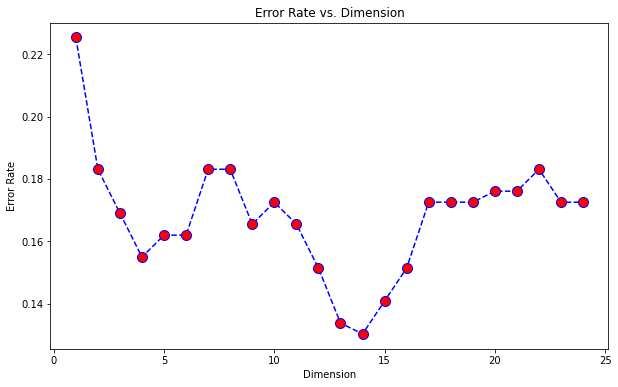

In [132]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Dimension')
plt.xlabel('Dimension')
plt.ylabel('Error Rate')
# num of dimensions that most minimizes error is 14

In [133]:
pca = PCA(n_components=14)

In [134]:
pca.fit(scaled_features)

PCA(n_components=14)

In [135]:
scaled_features2 = pca.transform(scaled_features)

In [136]:
scaled_features.shape

(946, 25)

In [137]:
scaled_features2.shape
# successfully reduced dimension of data

(946, 14)

In [138]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_features2, diabetes['Diabetic'],
                                                    test_size=0.30, random_state = 3)

In [139]:
def smote_data2(X, y):
    smotenc = SMOTENC(sampling_strategy = 1.0, categorical_features = list(range(0,10)), random_state = 3)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote
X_train2_smote, y_train2_smote = smote_data2(X_train2, y_train2)

In [140]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [141]:
knn.fit(X_train2_smote, y_train2_smote)

KNeighborsClassifier()

In [142]:
pred2 = knn.predict(X_test2)

In [143]:
print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       210
         1.0       0.79      0.78      0.79        74

    accuracy                           0.89       284
   macro avg       0.86      0.86      0.86       284
weighted avg       0.89      0.89      0.89       284



In [109]:
# our KNN model still appears significantly less effective than the logistic regression model.
# let's try to optimize k value

In [110]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

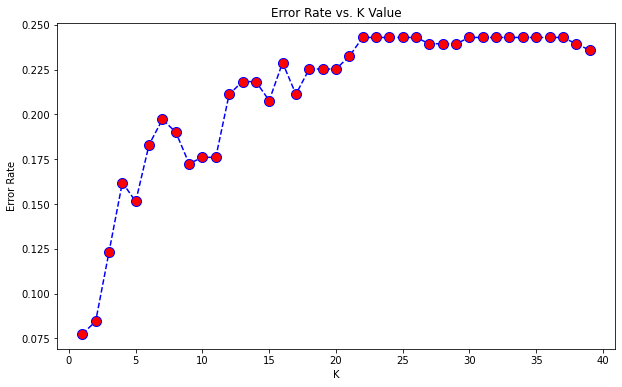

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# k value of 1 provides best estimate

In [112]:
# retrain model with k=1
knn2 = KNeighborsClassifier(n_neighbors = 1)
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=1)

In [113]:
pred2 = knn2.predict(X_test2)

In [114]:
print(classification_report(pred2, y_test2))
# recall is significantly improved so we will use new k value
# now try grid search to improve remaining hyperparameters

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       211
         1.0       0.81      0.82      0.82        73

    accuracy                           0.90       284
   macro avg       0.87      0.88      0.88       284
weighted avg       0.91      0.90      0.91       284



In [115]:
grid2 = {
    'n_neighbors': [1],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
        }

In [116]:
gs2 = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = grid2, scoring = 'recall',
                 refit = True, verbose = 1)

In [117]:
gs2.fit(X_train2, y_train2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [118]:
gs2.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [119]:
pred3 = gs2.predict(X_test2)

In [120]:
print(classification_report(pred3, y_test))
# our model was already optimized by tuning the k parameter, so tuning the other hyperparameters didn't really do much

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       211
         1.0       0.81      0.82      0.82        73

    accuracy                           0.90       284
   macro avg       0.87      0.88      0.88       284
weighted avg       0.91      0.90      0.91       284



In [121]:
# Now we would try another algorithm: Support Vector Machines (SVM)

In [122]:
svc_model = SVC()

In [123]:
svc_model.fit(X_train_smote,y_train_smote)

SVC()

In [124]:
pred4 = svc_model.predict(X_test)

In [125]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       210
         1.0       0.79      0.78      0.79        74

    accuracy                           0.89       284
   macro avg       0.86      0.86      0.86       284
weighted avg       0.89      0.89      0.89       284



In [134]:
grid_svm = {
    'C': [0.1,1,10],
    'kernel': ['poly', 'sigmoid','rbf','linear'],
    'degree': [2,3,4]
        }

In [135]:
gs_svm = GridSearchCV(estimator =SVC(), param_grid = grid_svm, scoring = 'recall')

In [136]:
gs_svm.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'kernel': ['poly', 'sigmoid', 'rbf', 'linear']},
             scoring='recall')

In [137]:
gs_svm.best_params_

{'C': 10, 'degree': 2, 'kernel': 'linear'}

In [138]:
gs_svm.best_estimator_

SVC(C=10, degree=2, kernel='linear')

In [139]:
gs_svm_predictions = gs_svm.predict(X_test)

In [140]:
print(classification_report(y_test,gs_svm_predictions))
# uh oh, our model somehow got worse after optimizing through grid search!

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       210
         1.0       0.63      0.77      0.69        74

    accuracy                           0.82       284
   macro avg       0.77      0.80      0.78       284
weighted avg       0.84      0.82      0.83       284



In [141]:
# Final classification algorithm: Decision tree / random forest

In [142]:
dtree = DecisionTreeClassifier()

In [143]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
pred6 = dtree.predict(X_test)

In [145]:
print(classification_report(y_test, pred6))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       210
         1.0       0.83      0.88      0.86        74

    accuracy                           0.92       284
   macro avg       0.89      0.91      0.90       284
weighted avg       0.92      0.92      0.92       284



In [146]:
# Wow, the decision tree classification model has amazing performance!
# Let's try 'bagging' the decision trees through the random forest classifier
# to see if we can further optimize performance

In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
pred7 = rfc.predict(X_test)

In [149]:
print(classification_report(pred7, y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       214
         1.0       0.81      0.86      0.83        70

    accuracy                           0.92       284
   macro avg       0.88      0.90      0.89       284
weighted avg       0.92      0.92      0.92       284



In [150]:
# it appears as though we actually experienced slightly poorer performance with bagging
# lets use gridsearch to optimize hyperparameters

In [151]:
grid_rf = {
    'n_estimators': [100, 200, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15]
        }

In [152]:
gs3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf, scoring = 'recall',
                 refit = True, verbose = 1)

In [153]:
gs3.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [154]:
gs3.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

In [157]:
gs3_predictions = gs3.predict(X_test)

In [158]:
# absolutely zero change
print(classification_report(gs3_predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       214
         1.0       0.81      0.86      0.83        70

    accuracy                           0.92       284
   macro avg       0.88      0.90      0.89       284
weighted avg       0.92      0.92      0.92       284



In [ ]:
# bagging didn't work, let's try using a boosting algorithm instead to improve our model

In [159]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [161]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10), n_estimators=200, random_state=0, algorithm='SAMME')

In [162]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=200, random_state=0)

In [163]:
pred8 = ada.predict(X_test)

In [164]:
# performace successfully improved!!
print(classification_report(pred8, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       213
         1.0       0.85      0.89      0.87        71

    accuracy                           0.93       284
   macro avg       0.91      0.92      0.91       284
weighted avg       0.93      0.93      0.93       284



In [ ]:
# CONCLUSION

In [ ]:
# When comparing the best achieved model performance of every classification algorithm we tested -
# Logistic Regression, K Nearest Neighbors, Support Vector Machines, and Decision Tree / Random Forest,
# implementing a simple decision tree (with boosting) by far achieved the performance. However, this 
# was likely because of the nature of our dataset being comprised of largely categorical (0/1) variables,
# which makes node-splitting extremely simple. Therefore, further research is needed to see how such an
# approach would work in general when predicting diabetes incidence in a population.